# Case Study Competition
Author : Tanu Bhandari

**1. Import the libraries**

In [72]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

** 2. Import data set **

In [5]:
# load datasets for two subjects, Math
maths = pd.read_csv("C:/Users/Lenovo/Downloads/Decor/Case study/student-mat.csv")

In [7]:
maths

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [8]:
maths.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
# rename column labels
maths.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [12]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
maths['final_grade'] = 'na'
maths.loc[(maths.final_score >= 15) & (maths.final_score <= 20), 'final_grade'] = 'good' 
maths.loc[(maths.final_score >= 10) & (maths.final_score <= 14), 'final_grade'] = 'fair' 
maths.loc[(maths.final_score >= 0) & (maths.final_score <= 9), 'final_grade'] = 'poor' 
maths.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [13]:
# look for missing values
df.isnull().any()

NameError: name 'df' is not defined

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

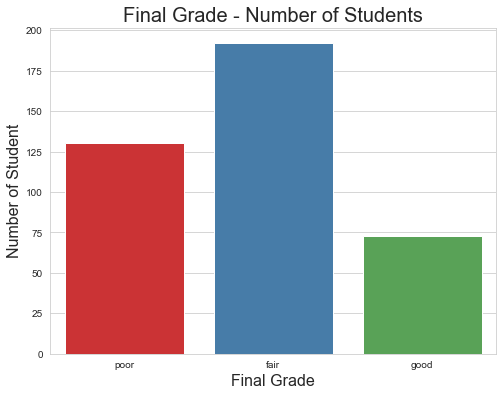

In [15]:
# EDA
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(maths.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

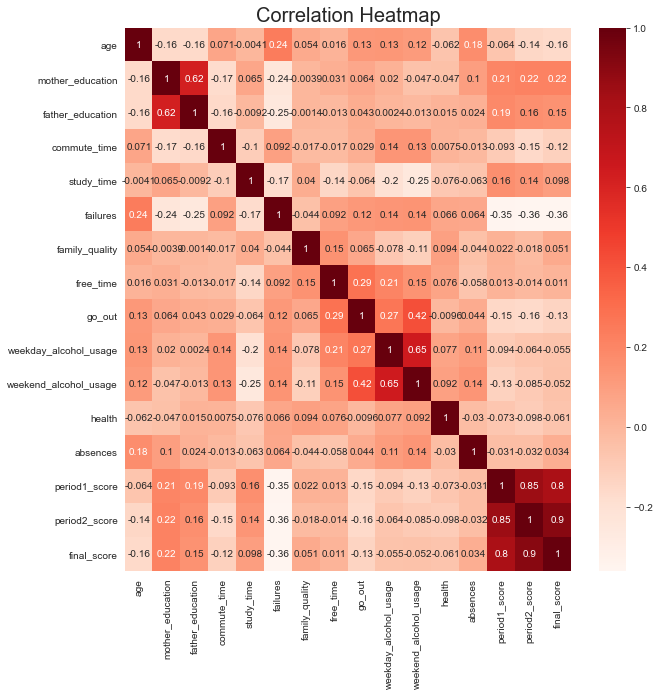

In [16]:
# see correlation between variables through a correlation heatmap
corr = maths.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [19]:
# students in a romantic relationship and those not in a relationship performance
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=maths.final_grade, columns=maths.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

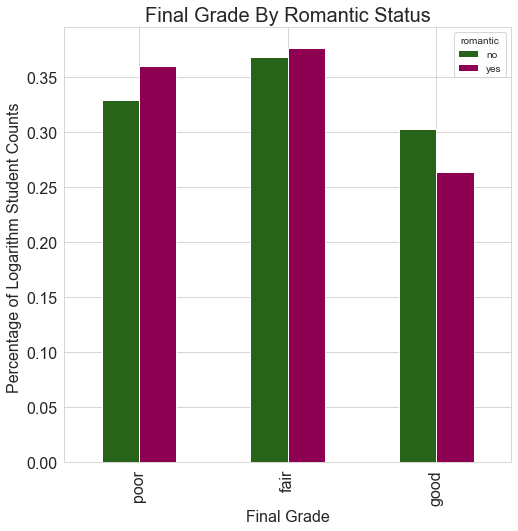

In [20]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [21]:
#Hyphothesis Testing confirmed, romantic status has a significant correlation with final grade.
# chi-square test result -- significant!
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.07582806500867001

In [22]:
#Final Grade By Alcohol Consumption
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=maths.final_grade, columns=maths.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Level of Alcohol Consumption')

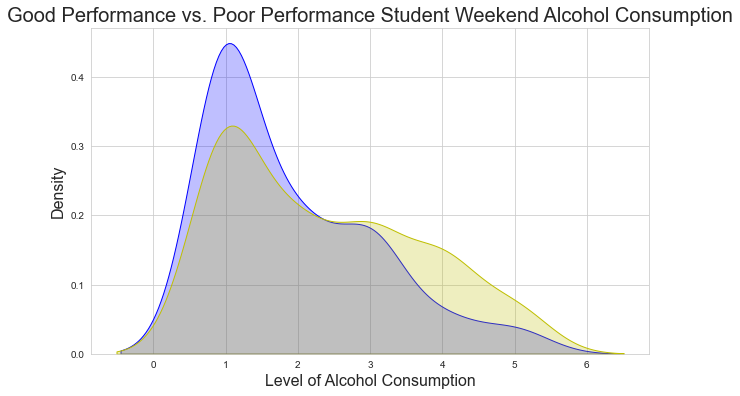

In [78]:
# create good student dataframe
good = maths.loc[maths.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = maths.loc[maths.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="b")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="y")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

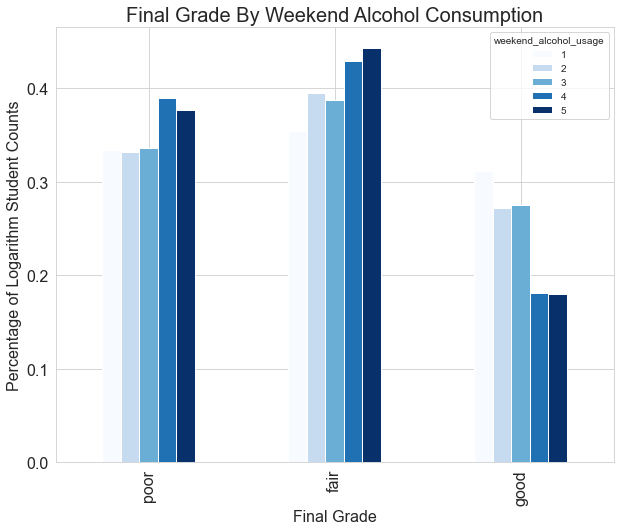

In [79]:
alc_perc.plot.bar(colormap="Blues", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [26]:
#Hyphothesis Testing confirmed, weekend alcohol consumption has a significant correlation with final grade
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.17794590768188145

In [27]:
#parents' education level influence student performance
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

<ipython-input-27-b47c0092fc8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_father_education'] = good.father_education
<ipython-input-27-b47c0092fc8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_father_education'] = poor.father_education
<ipython-input-27-b47c0092fc8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Text(0.5, 0, 'Father Education Level')

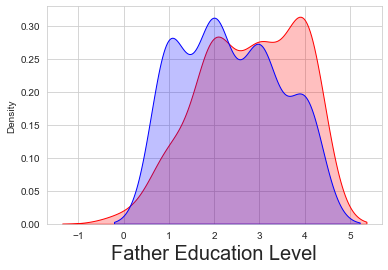

In [28]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)

In [30]:
#OLS tells that parents' education level has a positive correlation with students' final score. 
#Comparatively, mother's education level has bigger influence than father's education level!
# use OLS to see coefficients
X_edu = maths[['mother_education','father_education']]
y_edu = maths.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            final_score   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              733.2
Date:                Sat, 01 May 2021   Prob (F-statistic):                   2.34e-133
Time:                        15:41:46   Log-Likelihood:                         -1214.0
No. Observations:                 395   AIC:                                      2432.
Df Residuals:                     393   BIC:                                      2440.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.3510      0.271      8.660      0.000       1.817       2.885
father_education     1.1911      0.293      4.072      0.000       0.616       1.766
==============================================================================
Omnibus:                       12.896   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.282
Skew:                          -0.441   Prob(JB):                      0.00131
Kurtosis:                       3.167   Cond. No.                         5.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Frequency of Going Out')

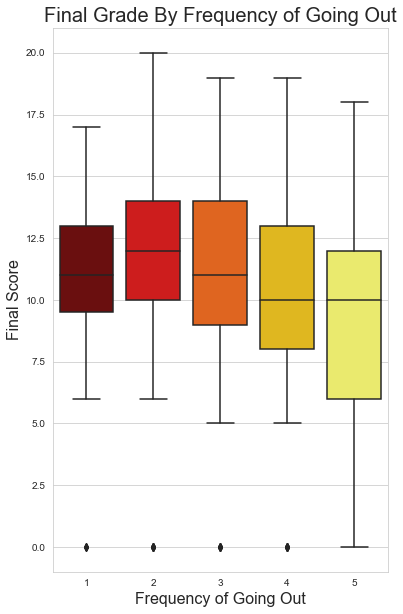

In [32]:
#Final Grade By Frequency Of Going Out
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=maths, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

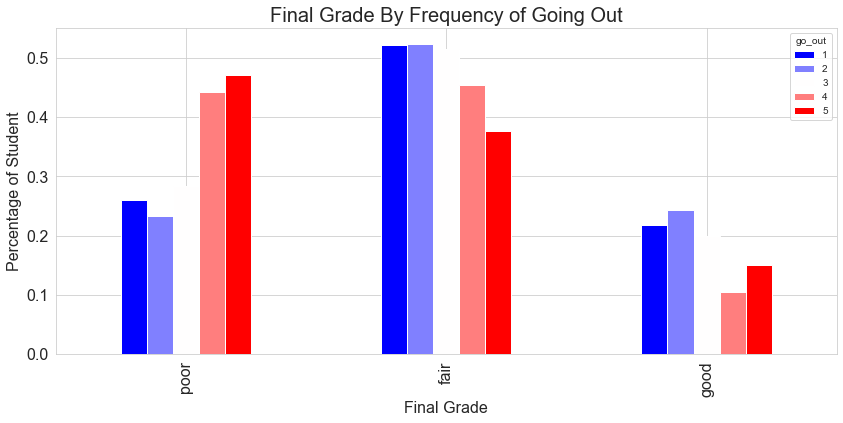

In [77]:
out_tab = pd.crosstab(index=maths.final_grade, columns=maths.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="bwr", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [36]:
#Hyphothesis Testing confirmed, the frequency of going out with friends has a significant correlation with students' final performance.
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

0.02011679893175289

Text(0.5, 0, 'Age')

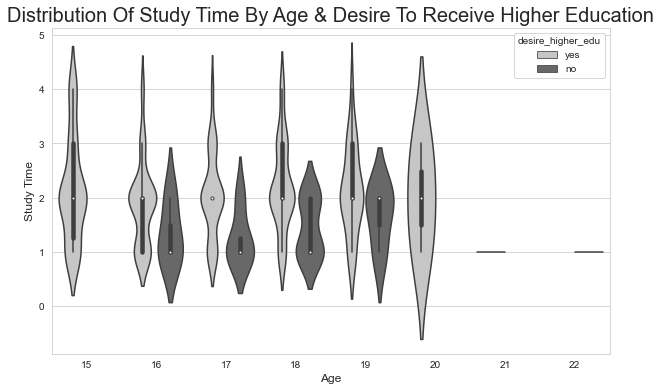

In [76]:
#Final Grade By Desire To Go To College
# Desire for higher education and study time by age 
plt.figure(figsize=(10,6))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=maths, palette="Greys", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=12)
plt.xlabel('Age', fontsize=12)

In [41]:
higher_tab = pd.crosstab(index=maths.final_grade, columns=maths.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

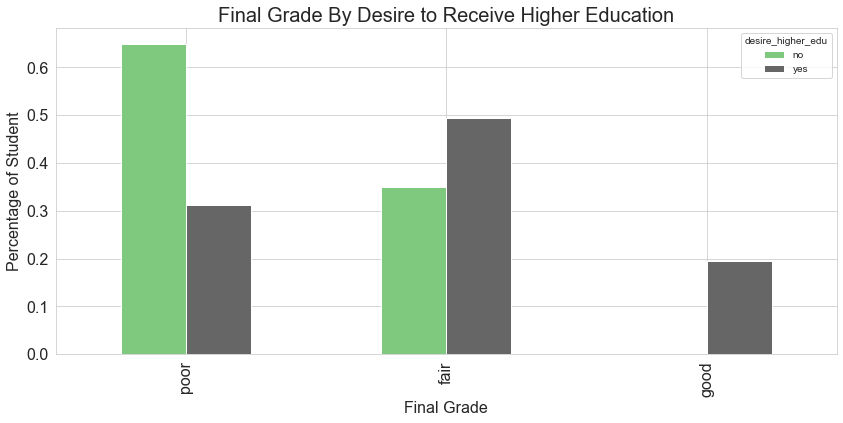

In [42]:
higher_perc.plot.bar(colormap="Accent", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [43]:
#Hyphothesis Testing confirmed, the desire of going to college has a significant correlation with students' final performance.
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

0.006432095965317797

In [45]:
#Final Grade By Living Area
# living area: urban vs. rural
maths.address = maths.address.map({'U':'Urban', 'R':'Rural'})

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


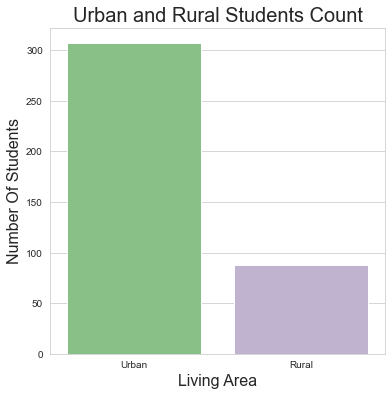

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(maths.address, palette='Accent')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [48]:
ad_tab1 = pd.crosstab(index=maths.final_grade, columns=maths.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

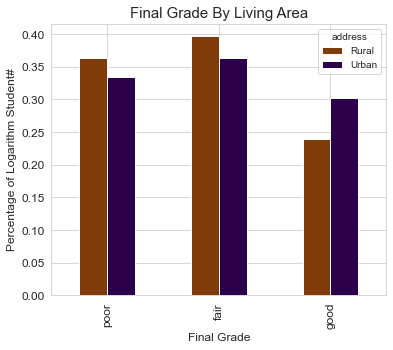

In [75]:
ad_perc.plot.bar(colormap="PuOr", fontsize=12, figsize=(6,5))
plt.title('Final Grade By Living Area', fontsize=15)
plt.ylabel('Percentage of Logarithm Student#', fontsize=12)
plt.xlabel('Final Grade', fontsize=12)

In [50]:
#Hyphothesis Testing confirmed, living area has a significant correlation with students' final performance.
# chi-square test result -- significant!
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.13691116387177005

In [51]:
# explore other variables via OLS
maths1 = maths.copy()
X_ols = maths1.drop(['period1_score', 'period2_score', 'final_score','final_grade', 'failures','study_time','absences'], axis=1)
X_ols = pd.get_dummies(X_ols)

In [53]:
mod = sm.OLS(maths.final_score, X_ols)
mod = mod.fit()

In [54]:
#Prepare Dataset for Modelling
# create dataframe dfd for classification
dfd = maths.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [55]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [56]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [57]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [58]:
# see total number of features
len(list(X_train))

58

In [59]:
#Decision Tree Classification
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

13    0.87395
14    0.87395
15    0.87395
16    0.87395
17    0.87395
18    0.87395
19    0.87395
20    0.87395
21    0.87395
22    0.87395
23    0.87395
24    0.87395
25    0.87395
26    0.87395
27    0.87395
28    0.87395
29    0.87395
30    0.87395
31    0.87395
32    0.87395
33    0.87395
34    0.87395
35    0.87395
36    0.87395
37    0.87395
38    0.87395
39    0.87395
40    0.87395
41    0.87395
42    0.87395
43    0.87395
44    0.87395
45    0.87395
46    0.87395
47    0.87395
dtype: float64

In [60]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.9094202898550725 , Cross Validation Score : 0.8739495798319328


In [61]:
#Random Forest Classification
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

6     0.865546
11    0.865546
12    0.865546
dtype: float64

In [62]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

1    0.865546
dtype: float64

In [63]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Raondom Forest Model Score : 0.9963768115942029 , Cross Validation Score : 0.8319327731092437


In [64]:
#Support Vector Classification
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.8695652173913043 , Cross Validation Score : 0.8151260504201681


In [65]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [66]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

1     0.680672
2     0.756303
3     0.831933
4     0.840336
5     0.495798
6     0.252101
7     0.327731
8     0.327731
9     0.327731
10    0.327731
11    0.327731
12    0.310924
13    0.504202
14    0.529412
15    0.588235
16    0.537815
17    0.554622
18    0.327731
19    0.327731
20    0.327731
21    0.327731
22    0.327731
23    0.327731
24    0.327731
25    0.243697
26    0.235294
27    0.252101
28    0.226891
29    0.327731
30    0.327731
31    0.235294
32    0.235294
33    0.243697
34    0.453782
35    0.478992
36    0.537815
37    0.512605
38    0.512605
39    0.848739
40    0.848739
41    0.823529
42    0.798319
43    0.815126
44    0.823529
45    0.831933
46    0.848739
47    0.831933
48    0.327731
49    0.848739
50    0.865546
51    0.831933
52    0.806723
53    0.445378
54    0.445378
55    0.453782
56    0.529412
57         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

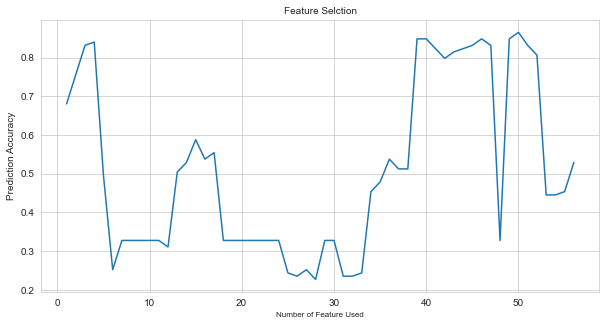

In [73]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=10)
plt.xlabel('Number of Feature Used', fontsize=8)
plt.ylabel('Prediction Accuracy', fontsize=10)

In [68]:
ks.where(ks==ks.max()).dropna()

50    0.865546
dtype: float64

In [69]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.8985507246376812 , Cross Validation Score : 0.3277310924369748


In [70]:
#Ada Boost Classification
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.8985507246376812 , Cross Validation Score : 0.8067226890756303


In [71]:
#Stochastic Gradient Descent Classification
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.8079710144927537 , Cross Validation Score : 0.680672268907563
